# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
from base.preprocess_clustering import Preprocess_Clustering
from base.plot import Plots
from base.AnomalyDetection import AnomalyDetection
from base.RootCause import RootCause

c:\Users\Olympic\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Olympic\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Olympic\AppData\Local\Programs\Python\P

In [3]:
preprocess_clustering = Preprocess_Clustering()
plots = Plots()
anomalyDetection = AnomalyDetection()
RootCause = RootCause()

object created
plotting ...


# 1. Load and Preprocess Data

In [4]:
data = preprocess_clustering.load_data(path="Data/NormalBehavior_events.log")
data

time                      Command_v1  id                 Source  \
1          0.275              brightnessLevel:41   1            LightSensor   
2          0.291                         lightOn  10             Controller   
3          0.450                  temperature:11   2             Thermostat   
4          0.468                        heaterOn  10             Controller   
5          0.608       ElectricityLevelOfBulbs:9   4  ElectricySensor4Bulbs   
...          ...                             ...  ..                    ...   
90014  28958.007  temperature:31.911001000933446   2             Thermostat   
90016  28959.017              brightnessLevel:90   1            LightSensor   
90017  28959.017  temperature:31.279120844796644   2             Thermostat   
90019  28960.008              brightnessLevel:90   1            LightSensor   
90020  28960.008  temperature:30.659752754066627   2             Thermostat   

            Destination               Command_v2  Time_integer  
1            Controller          brightnessLevel             0  
2      ElectricityPower                  lightOn             0  
3            Controller              temperature             0  
4                Heater                 heaterOn             0  
5            Controller  ElectricityLevelOfBulbs             0  
...                 ...                      ...           ...  
90014        Controller              temperature         28958  
90016        Controller          brightnessLevel         28959  
90017        Controller              temperature         28959  
90019        Controller          brightnessLevel         28960  
90020        Controller              temperature         28960  

[61060 rows x 7 columns]

In [5]:
data['Command_v2'].value_counts()

Command_v2
brightnessLevel             28961
temperature                 28961
ElectricityLevelOfHeater      966
ElectricityLevelOfBulbs       603
heaterOn                      483
heaterOff                     483
lightOn                       302
lightOff                      301
Name: count, dtype: int64

In [5]:
df = preprocess_clustering.prepration_data(data, 28960, 10)
df

index                                         Command_v2  \
0         0  brightnessLevel lightOn temperature heaterOn E...   
1         1  brightnessLevel temperature brightnessLevel te...   
2         2  brightnessLevel temperature brightnessLevel te...   
3         3  brightnessLevel temperature brightnessLevel te...   
4         4  brightnessLevel temperature brightnessLevel te...   
...     ...                                                ...   
2892   2892  brightnessLevel temperature brightnessLevel te...   
2893   2893  brightnessLevel temperature brightnessLevel te...   
2894   2894  brightnessLevel temperature brightnessLevel te...   
2895   2895  brightnessLevel temperature brightnessLevel te...   
2896   2896                        brightnessLevel temperature   

                                        tokenized_sents  
0     [brightnesslevel, lighton, temperature, heater...  
1     [brightnesslevel, temperature, brightnesslevel...  
2     [brightnesslevel, temperature, brightnesslevel...  
3     [brightnesslevel, temperature, brightnesslevel...  
4     [brightnesslevel, temperature, brightnesslevel...  
...                                                 ...  
2892  [brightnesslevel, temperature, brightnesslevel...  
2893  [brightnesslevel, temperature, brightnesslevel...  
2894  [brightnesslevel, temperature, brightnesslevel...  
2895  [brightnesslevel, temperature, brightnesslevel...  
2896                     [brightnesslevel, temperature]  

[2897 rows x 3 columns]

In [6]:
command = list(df.tokenized_sents.values)

# 2. Word Embedding

### 2.1. Word2Vec

In [61]:
X_w2v, vocab, model_w2v = preprocess_clustering.word2vec(command, vector_size=256, window=2, workers=4)

In [9]:
pca_result_w2v, pca_result_w2v_normalized = preprocess_clustering.PCA(n_components=8, alg_output=X_w2v)
pca_df_w2v = preprocess_clustering.DReduction_to_DataFrame(pca_result_w2v, vocab, 8, label=None)
pca_df_w2v_normalized = preprocess_clustering.DReduction_to_DataFrame(pca_result_w2v_normalized, vocab, 8, label=None)
plots.dimension_reduction_plot(df = pca_df_w2v,  wordEmbedding_alg = 'Word2Vec',  dimesionality_reduction_algorithm ='PCA')
plots.dimension_reduction_plot(df = pca_df_w2v_normalized,  wordEmbedding_alg = 'Word2Vec',  dimesionality_reduction_algorithm ='PCA normalized Data')

In [10]:
umap_result_w2v, umap_result_w2v_normalized = preprocess_clustering.UMAP(n_components=8, alg_output=X_w2v)
umap_df_w2v = preprocess_clustering.DReduction_to_DataFrame(umap_result_w2v, vocab, 8, label=None)
umap_df_w2v_normalized = preprocess_clustering.DReduction_to_DataFrame(umap_result_w2v_normalized, vocab, 8, label=None)
plots.dimension_reduction_plot(df = umap_df_w2v,  wordEmbedding_alg = 'Word2Vec',  dimesionality_reduction_algorithm ='UMAP')
plots.dimension_reduction_plot(df = umap_df_w2v_normalized,  wordEmbedding_alg = 'Word2Vec',  dimesionality_reduction_algorithm ='UMAP normalized Data')

c:\Users\Olympic\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:2344: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1

c:\Users\Olympic\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:2344: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



### 2.2. FastText

In [11]:
X_ft, vocab_ft, model = preprocess_clustering.fastText(command, vector_size=256, window=2, sg= 1, epochs=100, workers = 4, seed=42)

In [62]:
preprocess_clustering.save_model(model, 'fast_text_model.sav')

Your model saved


In [12]:
pca_result_ft, pca_result_normalized_ft = preprocess_clustering.PCA(n_components=5, alg_output=X_ft)
pca_df_ft = preprocess_clustering.DReduction_to_DataFrame(pca_result_ft, vocab_ft, 5, label=None)
pca_df_normalized_ft = preprocess_clustering.DReduction_to_DataFrame(pca_result_normalized_ft, vocab_ft, 5, label=None)
plots.dimension_reduction_plot(df = pca_df_ft,  wordEmbedding_alg = 'FastText',  dimesionality_reduction_algorithm ='PCA')
plots.dimension_reduction_plot(df = pca_df_normalized_ft,  wordEmbedding_alg = 'FastText',  dimesionality_reduction_algorithm ='PCA normalized Data')

In [13]:
umap_result_ft, umap_result_normalized_ft = preprocess_clustering.UMAP(n_components=5, alg_output=X_ft)
umap_df_ft = preprocess_clustering.DReduction_to_DataFrame(umap_result_ft, vocab_ft, 5, label=None)
umap_df_normalized_ft = preprocess_clustering.DReduction_to_DataFrame(umap_result_normalized_ft, vocab_ft, 5, label=None)
plots.dimension_reduction_plot(df = umap_df_ft,  wordEmbedding_alg = 'FastText',  dimesionality_reduction_algorithm ='UMAP')
plots.dimension_reduction_plot(df = umap_df_normalized_ft,  wordEmbedding_alg = 'Fasttext',  dimesionality_reduction_algorithm ='UMAP normalized Data')

c:\Users\Olympic\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:2344: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1

c:\Users\Olympic\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:2344: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



# 3. Clustering

### Word2Vec Output

In [43]:
umap_df_w2v_normalized['label_Kmeans'] = preprocess_clustering.kmeans(umap_result_w2v_normalized, 2)
umap_df_w2v_normalized['label_Kmeans'] = umap_df_w2v_normalized['label_Kmeans'].astype('str')
plots.clustering_plot(umap_df_w2v_normalized , umap_df_w2v_normalized['label_Kmeans'], 'Kmenas')

c:\Users\Olympic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [44]:
umap_df_w2v_normalized['label_Spectral'] = preprocess_clustering.SpectralClustering(umap_result_w2v_normalized, 2)
umap_df_w2v_normalized['label_Spectral'] = umap_df_w2v_normalized['label_Spectral'].astype('str')
plots.clustering_plot(umap_df_w2v_normalized, umap_df_w2v_normalized['label_Spectral'], 'Spectral')

c:\Users\Olympic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_spectral.py:688: UserWarning:

The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.



In [45]:
umap_df_w2v_normalized['label_DBSCAN'] =  preprocess_clustering.DBSACN(umap_result_w2v_normalized, 0.9, 2)
umap_df_w2v_normalized['label_DBSCAN'] = umap_df_w2v_normalized['label_DBSCAN'].astype('str')
plots.clustering_plot(umap_df_w2v_normalized, umap_df_w2v_normalized['label_DBSCAN'], 'DBSCAN')

In [21]:
umap_df_w2v_normalized['label_Agglomerative']  = preprocess_clustering.AgglomerativeClustering(umap_result_normalized_ft, 2)
umap_df_w2v_normalized['label_Agglomerative'] = umap_df_w2v_normalized['label_Agglomerative'].astype('str')
plots.clustering_plot(umap_df_w2v_normalized, umap_df_w2v_normalized['label_Agglomerative'], 'Agglomerative')

### FastText Output

In [46]:
umap_df_normalized_ft['label_Kmeans'] = preprocess_clustering.kmeans(umap_result_normalized_ft, 2)
umap_df_normalized_ft['label_Kmeans'] = umap_df_normalized_ft['label_Kmeans'].astype('str')
plots.clustering_plot(umap_df_normalized_ft , umap_df_normalized_ft['label_Kmeans'], 'Kmenas')

c:\Users\Olympic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [47]:
umap_df_normalized_ft['label_Spectral'] = preprocess_clustering.SpectralClustering(umap_result_normalized_ft, 2)
umap_df_normalized_ft['label_Spectral'] = umap_df_normalized_ft['label_Spectral'].astype('str')
plots.clustering_plot(umap_df_normalized_ft, umap_df_normalized_ft['label_Spectral'], 'Spectral')

In [59]:
umap_df_normalized_ft['label_DBSCAN'] =  preprocess_clustering.DBSACN(umap_result_normalized_ft, 1, 2)
umap_df_normalized_ft['label_DBSCAN'] = umap_df_normalized_ft['label_DBSCAN'].astype('str')
plots.clustering_plot(umap_df_normalized_ft, umap_df_normalized_ft['label_DBSCAN'], 'DBSCAN')

In [60]:
umap_df_normalized_ft['label_Agglomerative']  = preprocess_clustering.AgglomerativeClustering(umap_result_normalized_ft, 2)
umap_df_normalized_ft['label_Agglomerative'] = umap_df_normalized_ft['label_Agglomerative'].astype('str')
plots.clustering_plot(umap_df_normalized_ft, umap_df_normalized_ft['label_Agglomerative'], 'Agglomerative')

In [63]:
umap_df_normalized_ft.to_csv('Labels_Separated_Lights_Heater.csv')

### Assign Labels

In [7]:
umap_df_normalized_ft = pd.read_csv('Labels_Separated_Lights_Heater.csv')

In [8]:
Labels = []
for i in data.Command_v2:
    for j,k in zip(umap_df_normalized_ft.Words, umap_df_normalized_ft['label_Kmeans']):
        if i.lower() == j.lower():
            Labels.append(k)


data["Labels"] = Labels
data.Labels = data.Labels.astype('str')
data[['Command', 'Value']] = data.Command_v1.str.split(':', expand=True)
data.drop('Command', axis=1, inplace=True)
data.Value = data.Value.astype('float')
data

time                      Command_v1  id                 Source  \
1          0.275              brightnessLevel:41   1            LightSensor   
2          0.291                         lightOn  10             Controller   
3          0.450                  temperature:11   2             Thermostat   
4          0.468                        heaterOn  10             Controller   
5          0.608       ElectricityLevelOfBulbs:9   4  ElectricySensor4Bulbs   
...          ...                             ...  ..                    ...   
90014  28958.007  temperature:31.911001000933446   2             Thermostat   
90016  28959.017              brightnessLevel:90   1            LightSensor   
90017  28959.017  temperature:31.279120844796644   2             Thermostat   
90019  28960.008              brightnessLevel:90   1            LightSensor   
90020  28960.008  temperature:30.659752754066627   2             Thermostat   

            Destination               Command_v2  Time_integer Labels  \
1            Controller          brightnessLevel             0      1   
2      ElectricityPower                  lightOn             0      1   
3            Controller              temperature             0      0   
4                Heater                 heaterOn             0      0   
5            Controller  ElectricityLevelOfBulbs             0      1   
...                 ...                      ...           ...    ...   
90014        Controller              temperature         28958      0   
90016        Controller          brightnessLevel         28959      1   
90017        Controller              temperature         28959      0   
90019        Controller          brightnessLevel         28960      1   
90020        Controller              temperature         28960      0   

           Value  
1      41.000000  
2            NaN  
3      11.000000  
4            NaN  
5       9.000000  
...          ...  
90014  31.911001  
90016  90.000000  
90017  31.279121  
90019  90.000000  
90020  30.659753  

[61060 rows x 9 columns]

# 4. Anomaly Detection

In [9]:
np.unique(data.Labels)

array(['0', '1'], dtype=object)

In [12]:
df_1 = data.loc[data.Labels == "1", :]
df_2 = data.loc[data.Labels == "0", :]

## First Cluster

In [13]:
commands_actuator_df1 = df_1[df_1.Command_v1.str.contains("\w*[^\d]$", regex=True)].Command_v1.unique()
command_1_df1 = commands_actuator_df1[0]
command_2_df1 = commands_actuator_df1[1]

In [14]:
new_df_1, numeric_data_imputed_1 = anomalyDetection.prepare4autoencoder(df_1, 'Time_integer', 'Command_v1', command_1_df1, command_2_df1)
new_df_1

Command_v1
Time_integer                 
0              [41.0, 1, 9.0]
1                     [130.0]
2             [148.0, 0, 0.0]
3                      [99.0]
4                     [121.0]
...                       ...
28956                  [88.0]
28957                  [91.0]
28958                  [88.0]
28959                  [90.0]
28960                  [90.0]

[28961 rows x 1 columns]

In [15]:
history_1, autoencoder_1 = anomalyDetection.autoencoders4anomaly(numeric_data_imputed_1, 10,  0.001, 'relu', 
                                                'sigmoid', 'adam', 'mean_squared_error', 50, 2)


Epoch 1/50
14481/14481 [==============================] - 14s 901us/step - loss: 0.2024
Epoch 2/50
14481/14481 [==============================] - 16s 1ms/step - loss: 0.1844
Epoch 3/50
14481/14481 [==============================] - 20s 1ms/step - loss: 0.1841
Epoch 4/50
14481/14481 [==============================] - 18s 1ms/step - loss: 0.1841
Epoch 5/50
14481/14481 [==============================] - 81s 6ms/step - loss: 0.1841
Epoch 6/50
14481/14481 [==============================] - 71s 5ms/step - loss: 0.1841
Epoch 7/50
14481/14481 [==============================] - 76s 5ms/step - loss: 0.1841
Epoch 8/50
14481/14481 [==============================] - 77s 5ms/step - loss: 0.1841
Epoch 9/50
14481/14481 [==============================] - 75s 5ms/step - loss: 0.1841
Epoch 10/50
14481/14481 [==============================] - 65s 4ms/step - loss: 0.1841
Epoch 11/50
14481/14481 [==============================] - 76s 5ms/step - loss: 0.1841
Epoch 12/50
14481/14481 [=========================

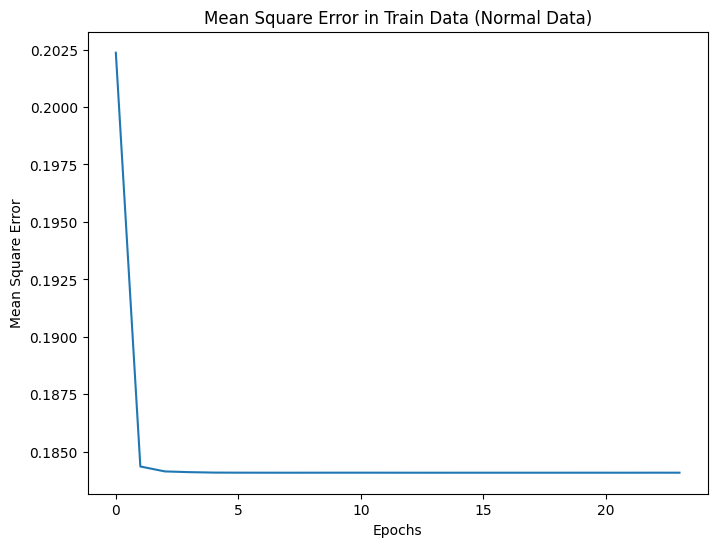

In [16]:
plots.loss_plot(history_1, 'loss', 'Mean Square Error', 'Mean Square Error in Train Data (Normal Data)')

906/906 [==============================] - 3s 3ms/step


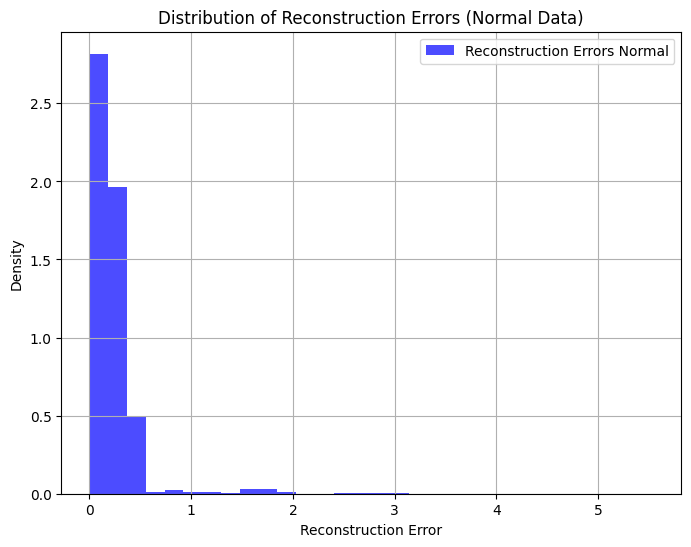

In [17]:
# Calculate reconstruction errors for normal data
reconstructed_normal_df_1 = autoencoder_1.predict(numeric_data_imputed_1)
reconstruction_errors_normal_df_1 = np.mean(np.square(numeric_data_imputed_1 -reconstructed_normal_df_1), axis=1)

plots.plot_reconstruction_error(reconstruction_errors_normal_df_1, "Normal")

### Abnormal Data

In [9]:
anomaly_data_1 = preprocess_clustering.load_data(path="Data/events_bublsActuatorBurn.log")
Labels = []

for i in anomaly_data_1.Command_v2:
    for j,k in zip(umap_df_normalized_ft.Words, umap_df_normalized_ft['label_Kmeans']):
        if i.lower() == j.lower():
            Labels.append(k)

anomaly_data_1["Labels"] = Labels
anomaly_data_1.Labels = anomaly_data_1.Labels.astype('str')
anomaly_data_1[['Command', 'Value']] = anomaly_data_1.Command_v1.str.split(':', expand=True)
anomaly_data_1.drop('Command', axis=1, inplace=True)
anomaly_data_1.Value = anomaly_data_1.Value.astype('float')

df_1_anomaly = anomaly_data_1.loc[anomaly_data_1.Labels == "1", :]
df_2_anomaly = anomaly_data_1.loc[anomaly_data_1.Labels == "0", :]

In [10]:
commands_actuator_df1_anomaly = df_1_anomaly[df_1_anomaly.Command_v1.str.contains("\w*[^\d]$", regex=True)].Command_v1.unique()
command_1_df1_anomaly = commands_actuator_df1_anomaly[0]
command_2_df1_anomaly = commands_actuator_df1_anomaly[1]

In [20]:
new_df_1_anomaly, numeric_data_imputed_1_anomaly = anomalyDetection.prepare4autoencoder(df_1_anomaly, 'Time_integer', 'Command_v1', 
                                                                                        command_1_df1_anomaly, command_2_df1_anomaly)
new_df_1_anomaly

Command_v1
Time_integer                 
0              [39.0, 1, 7.0]
1                     [129.0]
2             [150.0, 0, 0.0]
3                      [99.0]
4                     [120.0]
...                       ...
1093           [78.0, 1, 0.0]
1094           [72.0, 1, 0.0]
1095           [62.0, 1, 0.0]
1096           [50.0, 1, 0.0]
1097           [39.0, 1, 0.0]

[1098 rows x 1 columns]

35/35 [==============================] - 0s 2ms/step


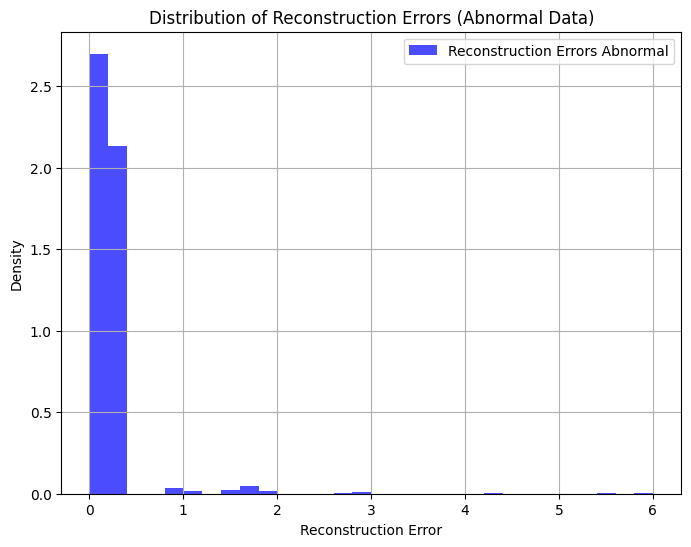

In [21]:
# Calculate reconstruction errors for the new data
reconstructed_data_anomaly_1 = autoencoder_1.predict(numeric_data_imputed_1_anomaly)
reconstruction_errors_data_anomaly = np.mean(np.square(numeric_data_imputed_1_anomaly - reconstructed_data_anomaly_1), axis=1)

plots.plot_reconstruction_error(reconstruction_errors_data_anomaly, "Abnormal")

In [26]:
# Calculate the quantile-based threshold
threshold = np.quantile(reconstruction_errors_normal_df_1, 0.996)
threshold

1.8422884043090173

In [27]:
anomalies = anomalyDetection.detect_anoamly(reconstruction_errors_data_anomaly, threshold, new_df_1_anomaly)

7
Detected anomalies:
Index: 0, Data: [39.0, 1, 7.0]
Index: 290, Data: [60.0, 1, 8.0]
Index: 980, Data: [58.0, 1, 9.0]
Index: 1094, Data: [72.0, 1, 0.0]
Index: 1095, Data: [62.0, 1, 0.0]
Index: 1096, Data: [50.0, 1, 0.0]
Index: 1097, Data: [39.0, 1, 0.0]


## Second cluster 

In [29]:
commands_actuator_df2 = df_2[df_2.Command_v1.str.contains("\w*[^\d]$", regex=True)].Command_v1.unique()
command_1_df2 = commands_actuator_df2[0]
command_2_df2 = commands_actuator_df2[1]
commands_actuator_df2

array(['heaterOn', 'heaterOff'], dtype=object)

In [30]:
new_df_2, numeric_data_imputed_2 = anomalyDetection.prepare4autoencoder(df_2, 'Time_integer', 'Command_v1', command_1_df2, command_2_df2)
new_df_2

Command_v1
Time_integer                      
0                  [11.0, 1, 45.0]
1              [21.55925887778514]
2              [32.02308663422517]
3              [42.27971671872675]
4              [52.33325192008907]
...                            ...
28956          [33.21331365747916]
28957          [32.55564598296483]
28958         [31.911001000933446]
28959         [31.279120844796644]
28960         [30.659752754066627]

[28961 rows x 1 columns]

In [31]:
history_2, autoencoder_2 = anomalyDetection.autoencoders4anomaly(numeric_data_imputed_2, 10,  0.001, 'relu', 
                                                'sigmoid', 'adam', 'mean_squared_error', 50, 1)

Epoch 1/50
28961/28961 [==============================] - 127s 4ms/step - loss: 0.1881
Epoch 2/50
28961/28961 [==============================] - 123s 4ms/step - loss: 0.1808
Epoch 3/50
28961/28961 [==============================] - 124s 4ms/step - loss: 0.1808
Epoch 4/50
28961/28961 [==============================] - 127s 4ms/step - loss: 0.1808
Epoch 5/50
28961/28961 [==============================] - 112s 4ms/step - loss: 0.1808
Epoch 6/50
28961/28961 [==============================] - 106s 4ms/step - loss: 0.1808
Epoch 7/50
28961/28961 [==============================] - 92s 3ms/step - loss: 0.1808
Epoch 8/50
28961/28961 [==============================] - 95s 3ms/step - loss: 0.1808
Epoch 9/50
28961/28961 [==============================] - 91s 3ms/step - loss: 0.1808
Epoch 10/50
28961/28961 [==============================] - 92s 3ms/step - loss: 0.1808
Epoch 11/50
28961/28961 [==============================] - 77s 3ms/step - loss: 0.1808
Epoch 12/50
28961/28961 [=====================

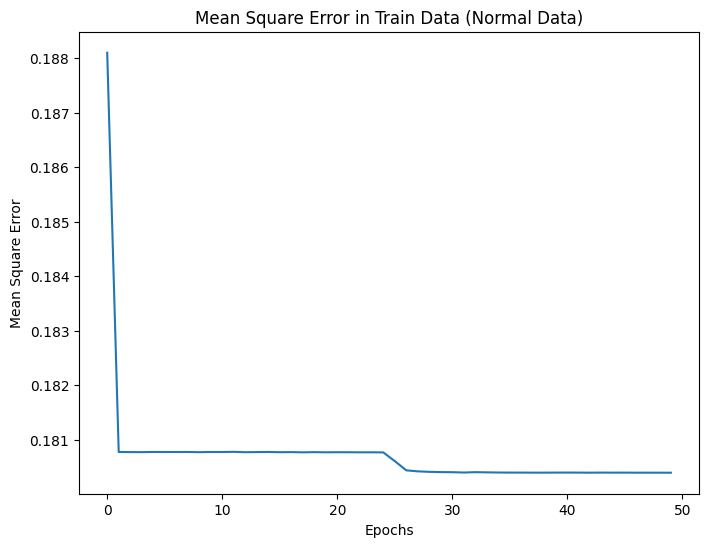

In [32]:
plots.loss_plot(history_2, 'loss', 'Mean Square Error', 'Mean Square Error in Train Data (Normal Data)')

906/906 [==============================] - 4s 4ms/step


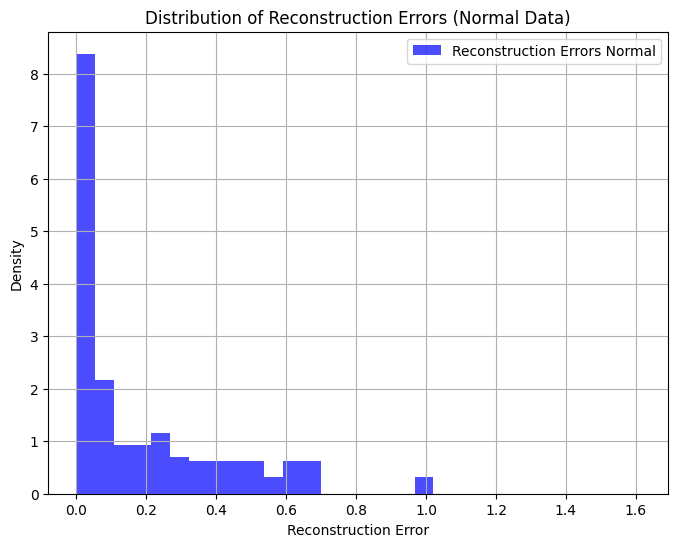

In [33]:
# Calculate reconstruction errors for normal data
reconstructed_normal_df_2 = autoencoder_2.predict(numeric_data_imputed_2)
reconstruction_errors_normal_df_2 = np.mean(np.square(numeric_data_imputed_2 -reconstructed_normal_df_2), axis=1)

plots.plot_reconstruction_error(reconstruction_errors_normal_df_2, "Normal")

# 5. Root Cause Analysis

## First cluster

In [13]:
df_1_sensors = df_1.dropna()
df_1_sensors

time                 Command_v1 id                 Source  \
1          0.275         brightnessLevel:41  1            LightSensor   
5          0.608  ElectricityLevelOfBulbs:9  4  ElectricySensor4Bulbs   
8          1.074        brightnessLevel:130  1            LightSensor   
11         2.057        brightnessLevel:148  1            LightSensor   
13         2.129  ElectricityLevelOfBulbs:0  4  ElectricySensor4Bulbs   
...          ...                        ... ..                    ...   
90007  28956.001         brightnessLevel:88  1            LightSensor   
90010  28957.014         brightnessLevel:91  1            LightSensor   
90013  28958.007         brightnessLevel:88  1            LightSensor   
90016  28959.017         brightnessLevel:90  1            LightSensor   
90019  28960.008         brightnessLevel:90  1            LightSensor   

      Destination               Command_v2  Time_integer Labels  Value  
1      Controller          brightnessLevel             0      1   41.0  
5      Controller  ElectricityLevelOfBulbs             0      1    9.0  
8      Controller          brightnessLevel             1      1  130.0  
11     Controller          brightnessLevel             2      1  148.0  
13     Controller  ElectricityLevelOfBulbs             2      1    0.0  
...           ...                      ...           ...    ...    ...  
90007  Controller          brightnessLevel         28956      1   88.0  
90010  Controller          brightnessLevel         28957      1   91.0  
90013  Controller          brightnessLevel         28958      1   88.0  
90016  Controller          brightnessLevel         28959      1   90.0  
90019  Controller          brightnessLevel         28960      1   90.0  

[29564 rows x 9 columns]

In [14]:
df_sensor_1 = df_1_sensors.loc[df_1_sensors.id == np.unique(df_1_sensors.id)[0]]
df_sensor_2 = df_1_sensors.loc[df_1_sensors.id == np.unique(df_1_sensors.id)[1]]

### Sensor 1

In [15]:
sensor_1, trainX_1, trainY_1, validationX_1, validationY_1 = RootCause.split_Train_validation(df_sensor_1, 'Value', 0.2, 100)

size of train data: (28961, 1)
size of validtion data: (5792, 1)
reshape input to be [samples, time steps, features]
Training shape: (28860, 1, 100)
Validation shape: (5691, 1, 100)


In [16]:
history_sensor1, model_sensor1 =  RootCause.root_cause(trainX_1, trainY_1, validationX_1, validationY_1, 512, 
                                            512, 'relu', 'relu', 100, 'mean_squared_error', 'adam',
                                            200, 64)

Epoch 1/200
451/451 [==============================] - 33s 68ms/step - loss: 0.0117 - val_loss: 0.0060
Epoch 2/200
451/451 [==============================] - 29s 63ms/step - loss: 0.0063 - val_loss: 0.0064
Epoch 3/200
451/451 [==============================] - 28s 63ms/step - loss: 0.0062 - val_loss: 0.0063
Epoch 4/200
451/451 [==============================] - 29s 65ms/step - loss: 0.0059 - val_loss: 0.0055
Epoch 5/200
451/451 [==============================] - 29s 64ms/step - loss: 0.0059 - val_loss: 0.0056
Epoch 6/200
451/451 [==============================] - 29s 63ms/step - loss: 0.0058 - val_loss: 0.0054
Epoch 7/200
451/451 [==============================] - 28s 63ms/step - loss: 0.0056 - val_loss: 0.0059
Epoch 8/200
451/451 [==============================] - 28s 63ms/step - loss: 0.0056 - val_loss: 0.0058
Epoch 9/200
451/451 [==============================] - 29s 63ms/step - loss: 0.0056 - val_loss: 0.0058
Epoch 10/200
451/451 [==============================] - 29s 64ms/step - l

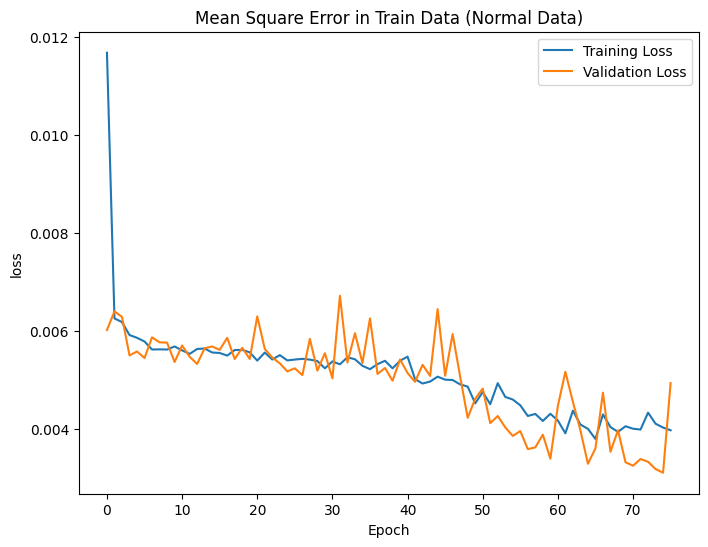

In [20]:
plots.valid_train_loss_plot(history_sensor1, 'Mean Square Error in Train Data (Normal Data)')

In [31]:
predict_1 = RootCause.compute_score(model_sensor1, trainX_1, trainY_1)

902/902 [==============================] - 11s 12ms/step
Train Score: 3.30 RMSE


In [22]:
newsensor_1 = RootCause.create_df_with_prediction(sensor_1, 100, predict_1, df_sensor_1['Time_integer'], 'train')
newsensor_1

time  orginal_data  predict_train
1          0          41.0            NaN
8          1         130.0            NaN
11         2         148.0            NaN
16         3          99.0            NaN
19         4         121.0            NaN
...      ...           ...            ...
90007  28956          88.0      90.004768
90010  28957          91.0      89.844444
90013  28958          88.0      89.729202
90016  28959          90.0      90.217171
90019  28960          90.0            NaN

[28961 rows x 3 columns]

In [23]:
plots.plot_original_prediction(newsensor_1, 'Light Sensor value in orginal and train data',
                               "Brightness Level", 'train', 'predict_train')

In [25]:
df_1_sensors_anomaly = df_1_anomaly.dropna()

df_sensor_1_anomaly = df_1_sensors_anomaly.loc[df_1_sensors_anomaly.id == np.unique(df_1_sensors_anomaly.id)[0]]
df_sensor_2_anomaly = df_1_sensors_anomaly.loc[df_1_sensors_anomaly.id == np.unique(df_1_sensors_anomaly.id)[1]]

In [28]:
sesnor_1_anomaly, testX_1, testY_1 = RootCause.prepare_test(df_sensor_1_anomaly, 'Value', 100)

Testing shape: (997, 1, 100)


In [30]:
predict_anomaly_1 = RootCause.compute_score(model_sensor1, testX_1, testY_1)

32/32 [==============================] - 0s 11ms/step
Train Score: 4.55 RMSE


In [32]:
newsensor_1_anomaly = RootCause.create_df_with_prediction(sesnor_1_anomaly, 100, predict_anomaly_1, df_sensor_1_anomaly ['Time_integer'], 'test')
newsensor_1_anomaly

time  orginal_data  predict_test
1        0          39.0           NaN
8        1         129.0           NaN
11       2         150.0           NaN
16       3          99.0           NaN
19       4         120.0           NaN
...    ...           ...           ...
3404  1093          78.0     78.652481
3409  1094          72.0     91.440010
3414  1095          62.0    130.542282
3419  1096          50.0    116.714005
3424  1097          39.0           NaN

[1098 rows x 3 columns]

In [33]:
plots.plot_original_prediction(newsensor_1_anomaly, 'Light Sensor value in orginal and test data',
                               "Brightness Level", 'test', 'predict_test')

In [39]:
print("Anomalies:", '\n', newsensor_1_anomaly.loc[abs(newsensor_1_anomaly.predict_test - newsensor_1_anomaly.orginal_data) >= 40, :])

Anomalies: 
       time  orginal_data  predict_test
3414  1095          62.0    130.542282
3419  1096          50.0    116.714005


### Sensor 2

In [43]:
sensor_2, trainX_2, trainY_2, validationX_2, validationY_2 = RootCause.split_Train_validation(df_sensor_2, 'Value', 0.2, 20)

size of train data: (603, 1)
size of validtion data: (120, 1)
reshape input to be [samples, time steps, features]
Training shape: (582, 1, 20)
Validation shape: (99, 1, 20)


In [44]:
history_sensor2, model_sensor2 =  RootCause.root_cause(trainX_2, trainY_2, validationX_2, validationY_2, 128, 
                                            128, 'relu', 'relu', 20, 'mean_squared_error', 'adam',
                                            200, 1)

Epoch 1/200
582/582 [==============================] - 8s 7ms/step - loss: 0.0869 - val_loss: 0.0606
Epoch 2/200
582/582 [==============================] - 3s 6ms/step - loss: 0.0526 - val_loss: 0.0661
Epoch 3/200
582/582 [==============================] - 3s 5ms/step - loss: 0.0525 - val_loss: 0.0570
Epoch 4/200
582/582 [==============================] - 4s 6ms/step - loss: 0.0540 - val_loss: 0.0542
Epoch 5/200
582/582 [==============================] - 4s 6ms/step - loss: 0.0523 - val_loss: 0.0587
Epoch 6/200
582/582 [==============================] - 4s 6ms/step - loss: 0.0511 - val_loss: 0.0575
Epoch 7/200
582/582 [==============================] - 4s 7ms/step - loss: 0.0513 - val_loss: 0.0530
Epoch 8/200
582/582 [==============================] - 4s 6ms/step - loss: 0.0517 - val_loss: 0.0530
Epoch 9/200
582/582 [==============================] - 5s 8ms/step - loss: 0.0499 - val_loss: 0.0563
Epoch 10/200
582/582 [==============================] - 4s 6ms/step - loss: 0.0509 - val_lo

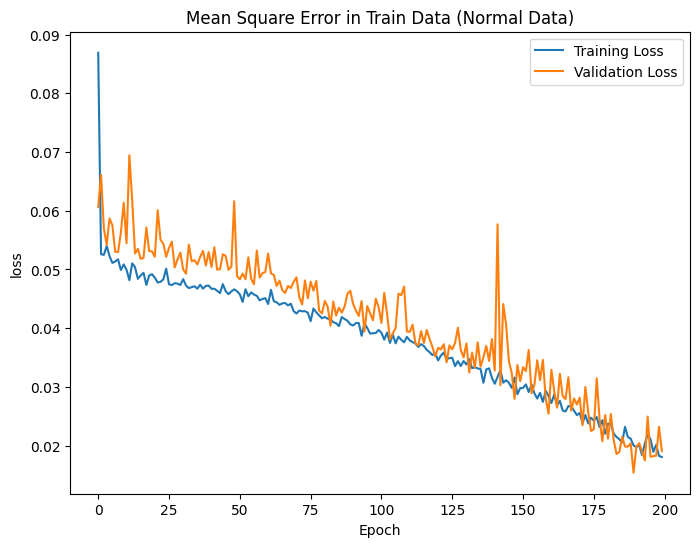

In [45]:
plots.valid_train_loss_plot(history_sensor2, 'Mean Square Error in Train Data (Normal Data)')

In [46]:
predict_2 = RootCause.compute_score(model_sensor2, trainX_2, trainY_2)

19/19 [==============================] - 1s 3ms/step
Train Score: 0.66 RMSE


In [47]:
newsensor_2 = RootCause.create_df_with_prediction(sensor_2, 20, predict_2, df_sensor_2['Time_integer'], 'train')
newsensor_2

time  orginal_data  predict_train
5          0           9.0            NaN
13         2           0.0            NaN
185       58           7.0            NaN
369      117           0.0            NaN
545      174           7.0            NaN
...      ...           ...            ...
89197  28694           6.0       5.925788
89377  28752           0.0       0.016406
89555  28809           7.0       6.277534
89734  28867           0.0       0.016508
89910  28924           6.0            NaN

[603 rows x 3 columns]

In [48]:
plots.plot_original_prediction(newsensor_2, 'Electricity Sensor value in orginal and train data',
                               "Electricity Level", 'train', 'predict_train')

In [49]:
sesnor_2_anomaly, testX_2, testY_2 = RootCause.prepare_test(df_sensor_2_anomaly, 'Value', 20)

Testing shape: (8, 1, 20)


In [50]:
predict_anomaly_2 = RootCause.compute_score(model_sensor2, testX_2, testY_2)

1/1 [==============================] - 0s 39ms/step
Train Score: 4.36 RMSE


In [52]:
newsensor_2_anomaly = RootCause.create_df_with_prediction(sesnor_2_anomaly, 20, predict_anomaly_2, df_sensor_2_anomaly ['Time_integer'], 'test')
newsensor_2_anomaly

time  orginal_data  predict_test
5        0           7.0           NaN
13       2           0.0           NaN
189     59           9.0           NaN
369    117           0.0           NaN
546    174           9.0           NaN
725    232           0.0           NaN
899    288           9.0           NaN
904    289           0.0           NaN
910    290           8.0           NaN
1086   347           0.0           NaN
1263   404           7.0           NaN
1444   462           0.0           NaN
1620   519           5.0           NaN
1801   577           0.0           NaN
1977   634           6.0           NaN
2157   692           0.0           NaN
2334   749           7.0           NaN
2514   807           0.0           NaN
2692   864           7.0           NaN
2871   922           0.0           NaN
3046   978           7.0      6.497605
3051   979           0.0      0.026970
3055   980           9.0      7.254398
3232  1037           0.0      0.029784
3406  1093           0.0      6.715941
3412  1094           0.0      0.019598
3416  1095           0.0     10.185061
3421  1096           0.0     -0.059236
3427  1097           0.0           NaN

In [54]:
plots.plot_original_prediction(newsensor_2_anomaly, 'Electricity Sensor value in orginal and test data',
                               "Electricity Level", 'test', 'predict_test')

In [56]:
print("Anomalies:", '\n', newsensor_2_anomaly.loc[abs(newsensor_2_anomaly.predict_test - newsensor_2_anomaly.orginal_data) >= 4, :])

Anomalies: 
       time  orginal_data  predict_test
3406  1093           0.0      6.715941
3416  1095           0.0     10.185061


## Second cluster

In [57]:
df_2_sensors = df_2.dropna()
df_2_sensors

time                      Command_v1 id                   Source  \
3          0.450                  temperature:11  2               Thermostat   
6          0.912     ElectricityLevelOfHeater:45  5  ElectricityLevel4Heater   
9          1.105   temperature:21.55925887778514  2               Thermostat   
14         2.136   temperature:32.02308663422517  2               Thermostat   
17         3.054   temperature:42.27971671872675  2               Thermostat   
...          ...                             ... ..                      ...   
90008  28956.001   temperature:33.21331365747916  2               Thermostat   
90011  28957.014   temperature:32.55564598296483  2               Thermostat   
90014  28958.007  temperature:31.911001000933446  2               Thermostat   
90017  28959.017  temperature:31.279120844796644  2               Thermostat   
90020  28960.008  temperature:30.659752754066627  2               Thermostat   

      Destination                Command_v2  Time_integer Labels      Value  
3      Controller               temperature             0      0  11.000000  
6      Controller  ElectricityLevelOfHeater             0      0  45.000000  
9      Controller               temperature             1      0  21.559259  
14     Controller               temperature             2      0  32.023087  
17     Controller               temperature             3      0  42.279717  
...           ...                       ...           ...    ...        ...  
90008  Controller               temperature         28956      0  33.213314  
90011  Controller               temperature         28957      0  32.555646  
90014  Controller               temperature         28958      0  31.911001  
90017  Controller               temperature         28959      0  31.279121  
90020  Controller               temperature         28960      0  30.659753  

[29927 rows x 9 columns]

In [58]:
df_sensor_3 = df_2_sensors.loc[df_2_sensors.id == np.unique(df_2_sensors.id)[0]]
df_sensor_4 = df_2_sensors.loc[df_2_sensors.id == np.unique(df_2_sensors.id)[1]]

### Sensor 1

In [60]:
sensor_3, trainX_3, trainY_3, validationX_3, validationY_3 = RootCause.split_Train_validation(df_sensor_3, 'Value', 0.2, 100)

size of train data: (28961, 1)
size of validtion data: (5792, 1)
reshape input to be [samples, time steps, features]
Training shape: (28860, 1, 100)
Validation shape: (5691, 1, 100)


In [61]:
history_sensor3, model_sensor3 =  RootCause.root_cause(trainX_3, trainY_3, validationX_3, validationY_3, 128, 
                                            128, 'relu', 'relu', 100, 'mean_squared_error', 'adam',
                                            200, 1)

Epoch 1/200
28860/28860 [==============================] - 191s 6ms/step - loss: 9.9018e-04 - val_loss: 1.5672e-05
Epoch 2/200
28860/28860 [==============================] - 186s 6ms/step - loss: 1.6221e-04 - val_loss: 1.7107e-05
Epoch 3/200
28860/28860 [==============================] - 184s 6ms/step - loss: 1.3055e-04 - val_loss: 8.8975e-06
Epoch 4/200
28860/28860 [==============================] - 183s 6ms/step - loss: 9.2577e-05 - val_loss: 4.0410e-05
Epoch 5/200
28860/28860 [==============================] - 183s 6ms/step - loss: 8.2539e-05 - val_loss: 9.9336e-06
Epoch 6/200
28860/28860 [==============================] - 181s 6ms/step - loss: 7.3936e-05 - val_loss: 1.2783e-04
Epoch 7/200
28860/28860 [==============================] - 205s 7ms/step - loss: 6.2827e-05 - val_loss: 2.4465e-05
Epoch 8/200
28860/28860 [==============================] - 206s 7ms/step - loss: 6.1326e-05 - val_loss: 7.4706e-06
Epoch 9/200
28860/28860 [==============================] - 208s 7ms/step - loss:

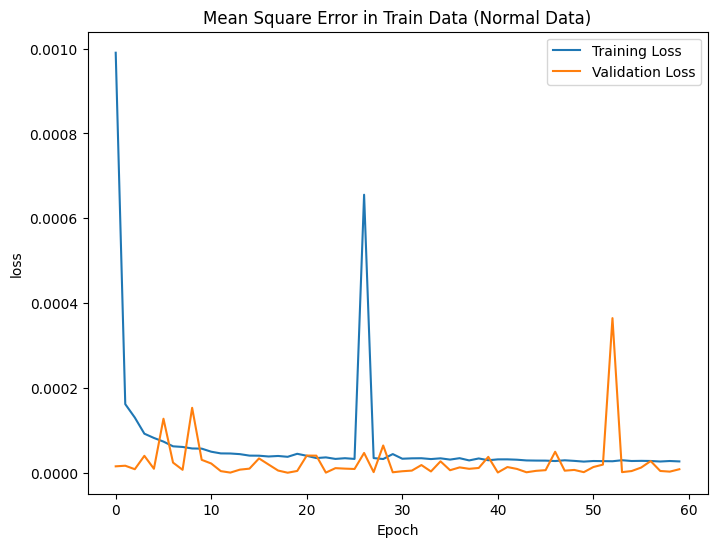

In [62]:
plots.valid_train_loss_plot(history_sensor3, 'Mean Square Error in Train Data (Normal Data)')

In [63]:
predict_3 = RootCause.compute_score(model_sensor3, trainX_3, trainY_3)

902/902 [==============================] - 3s 2ms/step
Train Score: 0.04 RMSE


In [64]:
newsensor_3 = RootCause.create_df_with_prediction(sensor_3, 100, predict_3, df_sensor_3['Time_integer'], 'train')
newsensor_3

time  orginal_data  predict_train
3          0     11.000000            NaN
9          1     21.559259            NaN
14         2     32.023087            NaN
17         3     42.279717            NaN
20         4     52.333252            NaN
...      ...           ...            ...
90008  28956     33.213314      33.226597
90011  28957     32.555646      32.566807
90014  28958     31.911001      31.919529
90017  28959     31.279121      31.284861
90020  28960     30.659753            NaN

[28961 rows x 3 columns]

In [65]:
plots.plot_original_prediction(newsensor_3, 'Temperature value in orginal and train data',
                               "Temperature", 'train', 'predict_train')

### Sensor 2

In [66]:
sensor_4, trainX_4, trainY_4, validationX_4, validationY_4 = RootCause.split_Train_validation(df_sensor_4, 'Value', 0.2, 15)

size of train data: (966, 1)
size of validtion data: (193, 1)
reshape input to be [samples, time steps, features]
Training shape: (950, 1, 15)
Validation shape: (177, 1, 15)


In [67]:
history_sensor4, model_sensor4 =  RootCause.root_cause(trainX_4, trainY_4, validationX_4, validationY_4, 128, 
                                            128, 'relu', 'relu', 15, 'mean_squared_error', 'adam',
                                            200, 1)

Epoch 1/200
950/950 [==============================] - 5s 3ms/step - loss: 0.0265 - val_loss: 0.0025
Epoch 2/200
950/950 [==============================] - 3s 4ms/step - loss: 0.0039 - val_loss: 0.0027
Epoch 3/200
950/950 [==============================] - 4s 4ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 4/200
950/950 [==============================] - 4s 4ms/step - loss: 0.0033 - val_loss: 0.0025
Epoch 5/200
950/950 [==============================] - 4s 4ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 6/200
950/950 [==============================] - 4s 4ms/step - loss: 0.0029 - val_loss: 0.0047
Epoch 7/200
950/950 [==============================] - 4s 4ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 8/200
950/950 [==============================] - 4s 4ms/step - loss: 0.0025 - val_loss: 0.0033
Epoch 9/200
950/950 [==============================] - 4s 4ms/step - loss: 0.0026 - val_loss: 0.0060
Epoch 10/200
950/950 [==============================] - 4s 4ms/step - loss: 0.0027 - val_lo

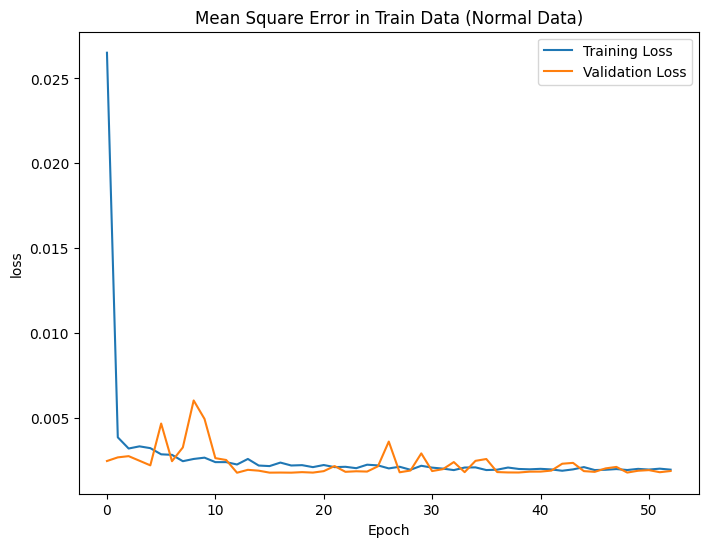

In [68]:
plots.valid_train_loss_plot(history_sensor4, 'Mean Square Error in Train Data (Normal Data)')

In [69]:
predict_4 = RootCause.compute_score(model_sensor4, trainX_4, trainY_4)

30/30 [==============================] - 0s 2ms/step
Train Score: 1.18 RMSE


In [70]:
newsensor_4 = RootCause.create_df_with_prediction(sensor_4, 15, predict_4, df_sensor_4['Time_integer'], 'train')
newsensor_4

time  orginal_data  predict_train
6          0          45.0            NaN
25         5           0.0            NaN
200       62          49.0            NaN
214       66           0.0            NaN
386      122          46.0            NaN
...      ...           ...            ...
89544  28806           0.0      -0.091214
89716  28862          49.0      47.755527
89730  28866           0.0      -0.096007
89902  28922          46.0      47.758232
89918  28926           0.0            NaN

[966 rows x 3 columns]

In [71]:
plots.plot_original_prediction(newsensor_4, 'Temperature value in orginal and train data',
                               "Temperature", 'train', 'predict_train')